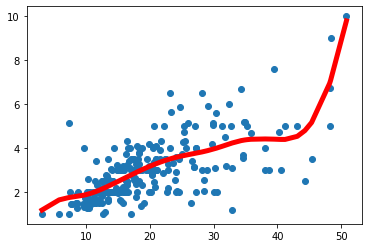

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("data10.csv")

x = data['total_bill']
y = data['tip']

xmat = np.mat(x)
ymat = np.mat(y)

size = np.shape(xmat)[1]
ones = np.mat(np.ones(size))

X = np.hstack((ones.T, xmat.T))

def lw(point, X, ymat, k):
    
    m,n = np.shape(X)
    weights = np.mat(np.eye(m))
    
    for i in range(m):
        diff = point - X[i]
        weights[i,i] = np.exp(diff*diff.T/(-2.0*k**2))
        pass
    W = (X.T * weights * X).I * (X.T * weights * ymat.T)
    return W

def lwr(X, ymat, k):
    m,n = np.shape(X)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = X[i] * lw(X[i], X, ymat, k)
        pass
    return ypred

def plot(X, pred):
    sort = X[:,1].argsort(0)
    
    xs = X[sort][:,0][:,1]
    ys = pred[sort]
    
    plt.scatter(x, y)
    plt.plot(xs, ys, linewidth=5, color="red")
    plt.show()
    pass

pred = lwr(X, ymat, 3)
plot(X, pred)